# Insertion-sort Vs Bubble-sort

## Introduzione

Vogliamo confrontare due diversi algoritmi di ordinamento di array, Insertion-sort e Bubble sort, analizzando il loro comportamento nel caso migliore, nel caso peggiore e nel caso medio. I due algoritmi verranno testati su array di diverse dimensioni, e in conclusione sarà possibile stabilire anche attraverso l'osservazione dei grafici quali siano le principali differenze tra i due e quali le somiglianze.

## La teoria

### Insertion-sort

Insertion-sort è un algoritmo piuttosto eficiente nel caso in cui il numero di elementi dell'array sia piccolo. Durante l'esecuzione ogni elemento viene inserito (da cui il nome) nella corretta posizione che dovrà occupare all'interno della permutazione finale.

L'invariante di ciclo per l'insertion sort è la seguente: 
“All’inizio di ogni iterazione del ciclo for il sottoarray A[1 . . j − 1] è
ordinato ed è formato dagli stessi elementi che erano originariamente
in A[1 . . j − 1], ma ordinati”


Algoritmo:

In [1]:
A = [14, 9, 5, 23, 57, 33]

for j in range(1,len(A)):
    print(A)
    key = A[j]
    i = j-1
    while i >= 0 and A[i] > key:
        A[i+1] = A[i]
        i = i-1
    A[i+1] = key

[14, 9, 5, 23, 57, 33]
[9, 14, 5, 23, 57, 33]
[5, 9, 14, 23, 57, 33]
[5, 9, 14, 23, 57, 33]
[5, 9, 14, 23, 57, 33]


### Bubble-sort 

Bubble-sort è un algoritmo che riduce il problema dell'ordinamento al confronto e allo swap di elementi successivi,facendo affiorare il massimo verso il fondo dell'array.La condizione di arresto coincide con l'effettuare un'iterazione durante la quale non vengono identificati due elementi fuori ordine(e quindi non vengono effettuati swap). 

L'invariante di ciclo per il Bubble-sort è la seguente: "All'inizio di ogni iterazione del ciclo esterno del bubble-sort, gli ultimi i elementi dell'array sono ordinati correttamente e si trovano nella loro posizione finale."

Algoritmo:

In [2]:
A = [14, 9, 5, 23, 57, 33]

for i in range(len(A)):
    print(A)
    swapped=False
    for j in range(0, len(A)-i-1):
        if A[j]>A[j+1]:
            A[j],A[j+1]=A[j+1],A[j]
            swapped=True
    if not swapped:
        break    




[14, 9, 5, 23, 57, 33]
[9, 5, 14, 23, 33, 57]
[5, 9, 14, 23, 33, 57]


## La complessità

### Insertion-sort

Il caso migliore per l'insertion-sort coincide con un array già ordinato (ordine crescente degli elementi), nel qual caso la complessità dell'algoritmo è funzione lineare di n;

Il caso peggiore per l'insertion-sort coincide con un array ordinato al contrario (ordine decrescente degli elementi), nel qual caso la compessità è funzione quadratica di n;

Il caso medio per l'insertion-sort spesso è altrettanto cattivo del peggiore.

### Bubble-sort

Il caso migliore per il bubble-sort coincide con un array già ordinato (ordine crescente degli elementi), nel qual caso la complessità dell'algoritmo è funzione lineare di n;

Il caso peggiore per il bubble-sort coincide con un array ordinato al contrario (ordine decrescente degli elementi), nel qual caso la compessità è funzione quadratica di n;

Il caso medio per il bubble-sort spesso è altrettanto cattivo del peggiore.

L'algoritmo bubble-sort è fortemente asimmetrico, e un modo per migliorare la sua complessità può essere quello di alternare l'affioramneto del massimo verso il fondo e l'affioramento del minimo verso l'inizio dell'array, arrivando ad una complessità pari a Θ(n*k), dove k è il numero di elementi perturbati.

## Esperimenti

Per testare i due algoritmi, essi verranno eseguiti su diversi array di dimensione sempre crescente da 1 a 1 000 000, formati da valori interi casuali.

 Verranno utilizzati grafici che mettono a confronto la crescita della dimensione dell'array con il tempo impiegato per l'esecuzione, e si verificherà quanto affermato nella sezione dedicata alla teoria, ovvero ci si aspetta che venga rispettata la complessità del caso medio.

 Infine si testeranno gli algoritmi nei casi rispettivamente ottimo e pessimo, acìnche in questo caso con il supporto di grafici che metteranno in evidenza la relazione tra dimensione dell'input e tempo impiegato, e verrà verificata la complessità nel caso ottimo e nel caso pessimo.

### Caso medio

Andiamo per prima cosa a definire le due funzioni che verranno utilizzate per questi esperimenti:

#### Definizione Insertion-sort

In [3]:
def insertion_sort(A):
    for j in range(1,len(A)):
     key = A[j]
     i = j-1
     while i >= 0 and A[i] > key:
        A[i+1] = A[i]
        i = i-1
     A[i+1] = key

#### Definizione Bubble-sort

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

def bubble_sort(A):
    for i in range(len(A)):
     swapped=False
     for j in range(0, len(A)-i-1):
        if A[j]>A[j+1]:
            A[j],A[j+1]=A[j+1],A[j]
            swapped=True
     if not swapped:
        break

#### Esperimento caso medio Insertion-sort

In questo esperimento stiamo eseguendo l'algoritmo Insertion-sort con array di ogni dimensione da 1 a 1000,dove ogni array contiene valori in un intervallo da 1 a 1000. 

Lungo l'asse delle ascisse troviamo la dimensione dell'array n, mentre lungo l'asse delle ordinate troviamo il tempo impiegato per eseguire l'operazione.

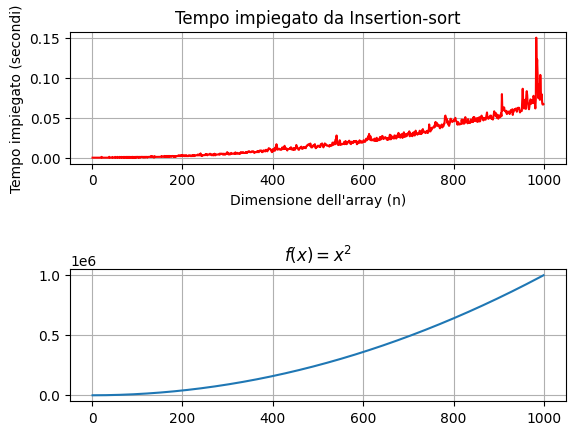

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
n_values = list(range(1, 1000))

# Lista per memorizzare i tempi impiegati per ogni dimensione dell'array
time_values = []

# Si esegue l'insertion-sort per ogni dimensione dell'array e si misura il tempo
for n in n_values:
    arr = np.random.randint(0, 1000, size=n)  # Si genera un array casuale di lunghezza n
    start_time = time.time()  # Tempo di inizio
    insertion_sort(arr)  # Si chiama la funzione insertion_sort definita sopra
    end_time = time.time()  # Tempo di fine
    elapsed_time = end_time - start_time  # Tempo trascorso
    time_values.append(elapsed_time)

# Grafico dei tempi di esecuzione in funzione della dimensione dell'array
plt.subplot(2, 1, 1)
plt.plot(n_values, time_values, linestyle='-',color='red')
plt.title('Tempo impiegato da Insertion-sort')
plt.xlabel('Dimensione dell\'array (n)')
plt.ylabel('Tempo impiegato (secondi)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_values,np.array(n_values) ** 2,linestyle='-')
plt.title('$f(x) = x^2$')
plt.grid(True)
plt.subplots_adjust(hspace=0.8) 
plt.show()

Il grafico della funzione tempo/dimensione assume la forma di una funzione quadratica, e questo rispetta le previsioni sull'esperimento riguardo alla complessità dell'algoritmo.

#### Esperimento caso medio Bubble-sort

Lo stesso esperimento viene eseguito poi per il Bubble-sort, utilizzando di nuovo array di ogni dimensione da 1 a 1000,dove ogni array contiene valori in un intervallo da 1 a 1000.

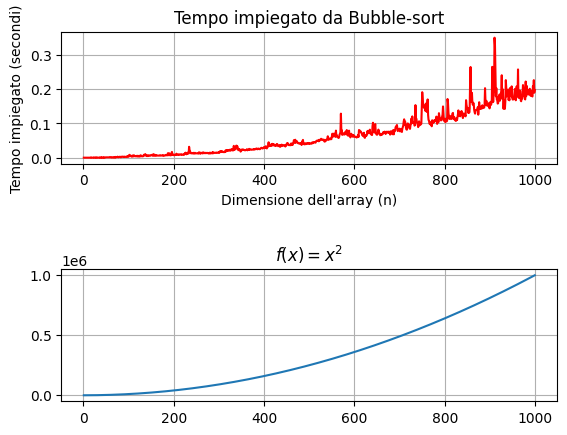

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
n_values = list(range(1, 1000))

# Lista per memorizzare i tempi impiegati per ogni dimensione dell'array
time_values = []

# Si esegue il bubble-sort per ogni dimensione dell'array e misura il tempo
for n in n_values:
    arr = np.random.randint(0, 1000, size=n)  # Si genera un array casuale di lunghezza n
    start_time = time.time()  # Tempo di inizio
    bubble_sort(arr)  # Si chiama la funzione bubble_sort definita sopra
    end_time = time.time()  # Tempo di fine
    elapsed_time = end_time - start_time  # Tempo trascorso
    time_values.append(elapsed_time)

# Grafico dei tempi di esecuzione in funzione della dimensione dell'array    
plt.subplot(2, 1, 1)
plt.plot(n_values, time_values,linestyle='-',color='red')
plt.title('Tempo impiegato da Bubble-sort')
plt.xlabel('Dimensione dell\'array (n)')
plt.ylabel('Tempo impiegato (secondi)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_values,np.array(n_values) ** 2,linestyle='-')
plt.title('$f(x) = x^2$')
plt.grid(True)
plt.subplots_adjust(hspace=0.8) 
plt.show()



Come possiamo osservare grafico della funzione tempo/dimensione assume anche in questo caso la forma di una funzione quadratica, e questo rispetta le previsioni sull'esperimento riguardo alla complessità dell'algoritmo.

### Caso ottimo

#### Esperimento caso ottimo Insertion-sort

Per eseguire l'esperimento sul caso ottimo dell'insertion-sort, gli array con dimensione da 1 a 1000 contengono elementi in un intervallo da 1 a n (dove n è la dimensione dell'array) già ordinati in senso crescente prima della chiamata a insertion-sort.

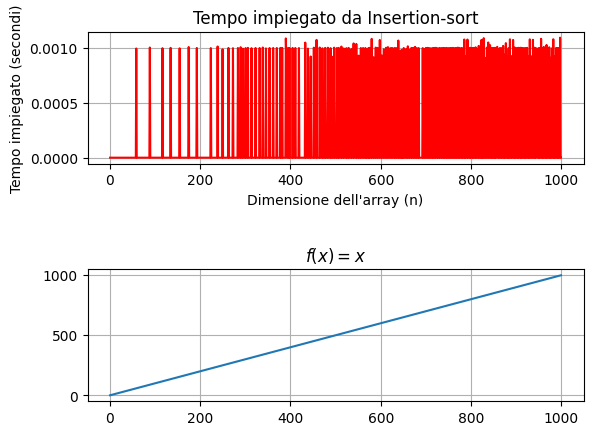

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
n_values = list(range(1, 1000))

# Lista per memorizzare i tempi impiegati per ogni dimensione dell'array
time_values = []

# Si esegue il bubble sort per ogni dimensione dell'array e si misura il tempo
for n in n_values:
    arr = np.arange(n)   # Si genera un array ordinato di lunghezza n
    start_time = time.time()  # Tempo di inizio
    insertion_sort(arr)  # Si chiama la funzione bubble_sort definita sopra
    end_time = time.time()  # Tempo di fine
    elapsed_time = end_time - start_time  # Tempo trascorso
    time_values.append(elapsed_time)

# Grafico dei tempi di esecuzione in funzione della dimensione dell'array
plt.subplot(2, 1, 1)
plt.plot(n_values, time_values, linestyle='-',color='red')
plt.title('Tempo impiegato da Insertion-sort')
plt.xlabel('Dimensione dell\'array (n)')
plt.ylabel('Tempo impiegato (secondi)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_values,np.array(n_values),linestyle='-')
plt.title('$f(x) = x$')
plt.grid(True)
plt.subplots_adjust(hspace=0.8) 
plt.show()

Come si può notare dal grafico l'ordinamento in questo caso viene eseguito così velocemente che l'andamento è quasi comparabile ad una costante (i picchi che si rilevano possono essere dovuti ad altre operazioni eseguite ma non inerenti all'esecuzione dell'insertion-sort)

#### Esperimento caso ottimo Bubble-sort

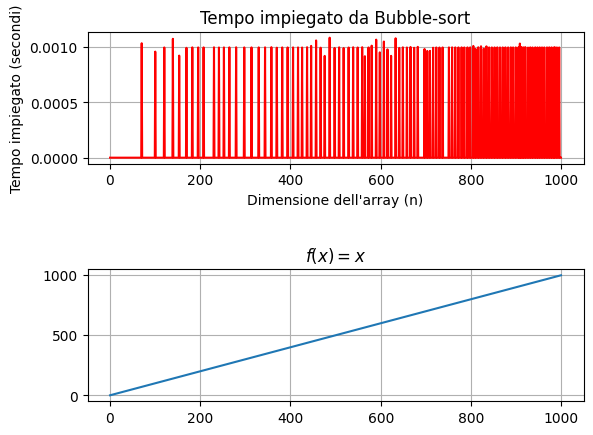

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
n_values = list(range(1, 1000))

# Lista per memorizzare i tempi impiegati per ogni dimensione dell'array
time_values = []

# Si esegue il bubble-sort per ogni dimensione dell'array e misura il tempo
for n in n_values:
    arr = np.arange(n)   # Si genera un array ordinato di lunghezza n
    start_time = time.time()  # Tempo di inizio
    bubble_sort(arr)  # Si chiama la funzione bubble_sort definita sopra
    end_time = time.time()  # Tempo di fine
    elapsed_time = end_time - start_time  # Tempo trascorso
    time_values.append(elapsed_time)

# Grafico dei tempi di esecuzione in funzione della dimensione dell'array    
plt.subplot(2, 1, 1)
plt.plot(n_values, time_values,linestyle='-',color='red')
plt.title('Tempo impiegato da Bubble-sort')
plt.xlabel('Dimensione dell\'array (n)')
plt.ylabel('Tempo impiegato (secondi)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_values,np.array(n_values),linestyle='-')
plt.title('$f(x) = x$')
plt.grid(True)
plt.subplots_adjust(hspace=0.8) 
plt.show()

Possiamo notare come anche in questo caso nel grafico la complessità si avvicina motlo a quella costante, e probabilmente sarebbe necessaria una lunghezza molto maggiore dell'array per poter visualizzare dal grafico l'andamento lineare.

### Caso pessimo

#### Esperimento caso pessimo Insertion-sort

Per eseguire l'esperimento sul caso ottimo dell'insertion-sort, gli array con dimensione da 1 a 1000 contengono elementi in un intervallo da 1 a n (dove n è la dimensione dell'array) ordinati in senso decrescente prima della chiamata a insertion-sort.

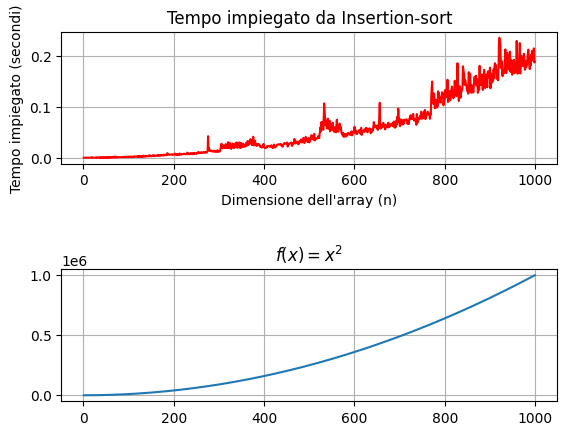

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
n_values = list(range(1, 1000))

# Lista per memorizzare i tempi impiegati per ogni dimensione dell'array
time_values = []

# Si esegue il bubble sort per ogni dimensione dell'array e si misura il tempo
for n in n_values:
    arr = np.arange(n)   # Si genera un array ordinato di lunghezza n
    arr = arr[::-1]  # Si inverte l'ordine degli elementi dell'array
    start_time = time.time()  # Tempo di inizio
    insertion_sort(arr)  # Si chiama la funzione bubble_sort definita sopra
    end_time = time.time()  # Tempo di fine
    elapsed_time = end_time - start_time  # Tempo trascorso
    time_values.append(elapsed_time)

# Grafico dei tempi di esecuzione in funzione della dimensione dell'array
plt.subplot(2, 1, 1)
plt.plot(n_values, time_values, linestyle='-',color='red')
plt.title('Tempo impiegato da Insertion-sort')
plt.xlabel('Dimensione dell\'array (n)')
plt.ylabel('Tempo impiegato (secondi)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_values,np.array(n_values)**2,linestyle='-')
plt.title('$f(x) = x^2$')
plt.grid(True)
plt.subplots_adjust(hspace=0.8) 
plt.show()

Come possiamo notare il caso pessimo ha complessità quadratica, e la funzione nel grafico è molto simile a quella generata dal caso medio, a dimostrazione di quanto affermato in precedenza, ovvero che il caso medio dell'insertion-sort è molto vicino al caso pessimo per quanto riguarda la complessità.Si evince che l'insertion sort non è un algoritmo di ordinamento molto efficiente.

#### Esperimento caso pessimo Bubble-sort

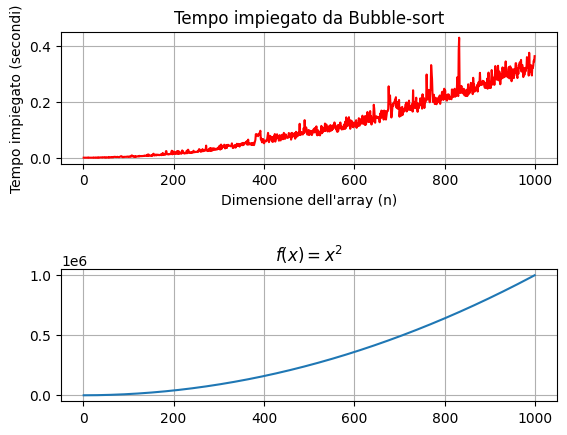

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
n_values = list(range(1, 1000))

# Lista per memorizzare i tempi impiegati per ogni dimensione dell'array
time_values = []

# Si esegue il bubble-sort per ogni dimensione dell'array e misura il tempo
for n in n_values:
    arr = np.arange(n)   # Si genera un array ordinato di lunghezza n
    arr = arr[::-1]  # Si inverte l'ordine degli elementi dell'array
    start_time = time.time()  # Tempo di inizio
    bubble_sort(arr)  # Si chiama la funzione bubble_sort definita sopra
    end_time = time.time()  # Tempo di fine
    elapsed_time = end_time - start_time  # Tempo trascorso
    time_values.append(elapsed_time)

# Grafico dei tempi di esecuzione in funzione della dimensione dell'array    
plt.subplot(2, 1, 1)
plt.plot(n_values, time_values,linestyle='-',color='red')
plt.title('Tempo impiegato da Bubble-sort')
plt.xlabel('Dimensione dell\'array (n)')
plt.ylabel('Tempo impiegato (secondi)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_values,np.array(n_values)**2,linestyle='-')
plt.title('$f(x) = x^2$')
plt.grid(True)
plt.subplots_adjust(hspace=0.8) 
plt.show()

Anche per il Bubble-sort possimao osservare che il caso pessimo ha complessità quadratica, e che il caso medio sia quindi molto simile ad esso, rendendo il bubble-sort un algoritmo di ordinamento non particolarmente efficiente.

## Conclusioni

Dall'analisi effettuata per i due algoritmi di ordinamento Insertion-sort e Bubble-sort si evince che malgrado il funzionamento sia differente, le prestazioni tendono ad assimilarsi se consideriamo la loro complessità asintotica, e questo avviene nel caso pessimo, di complessità quadratica per entrambi, nel caso ottimo, di complessità lineare per entrambi, e anche nel caso medio, che per entrambi si avvicina molto al caso pessimo. 

Questi due algoritmi di ordinamento sono più efficienti con array di piccole dimensioni, ma possiamo concludere che in generale non siano affatto efficienti, specialmente al crescere della dimensione dell'array fino a grandezze significative.